In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/alenjose/Desktop/data/meriSKILL_internship/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1)

In [4]:
len(df)

768

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

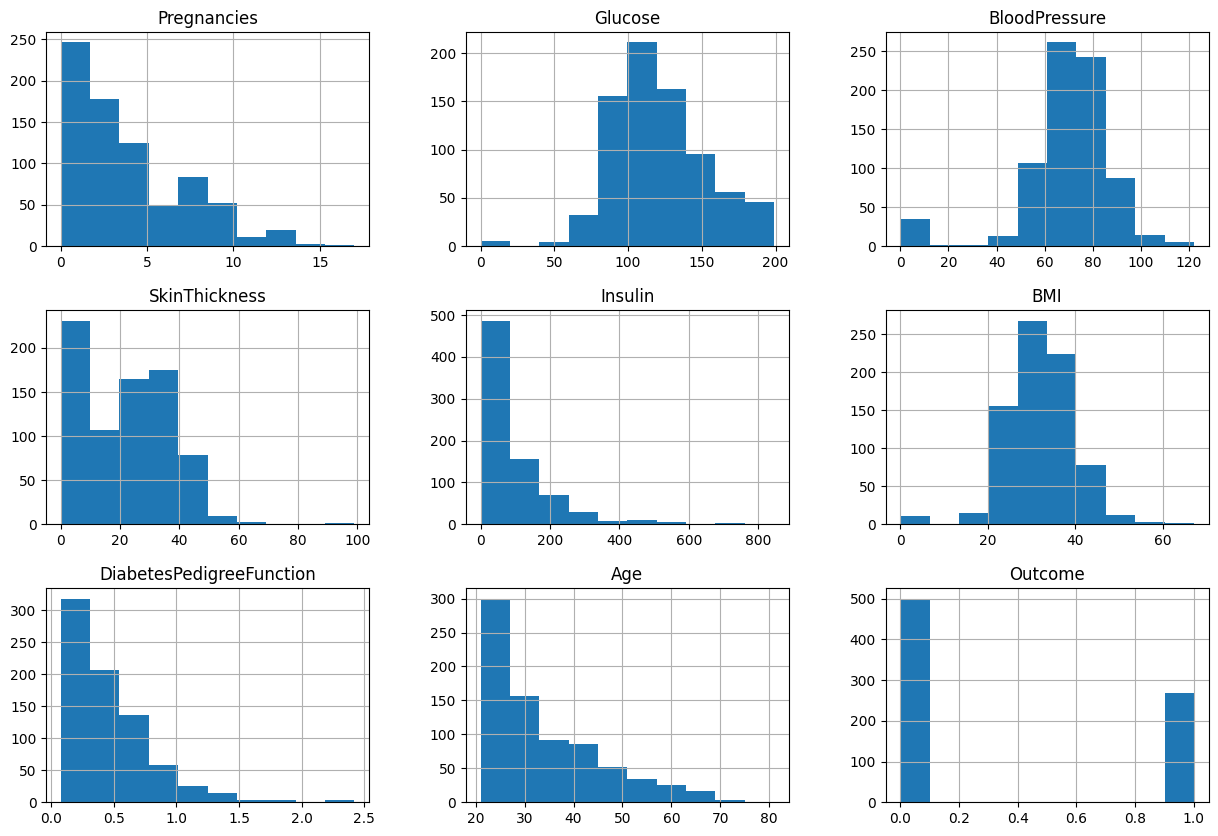

In [8]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,10))
plt.show()


<AxesSubplot: xlabel='Outcome'>

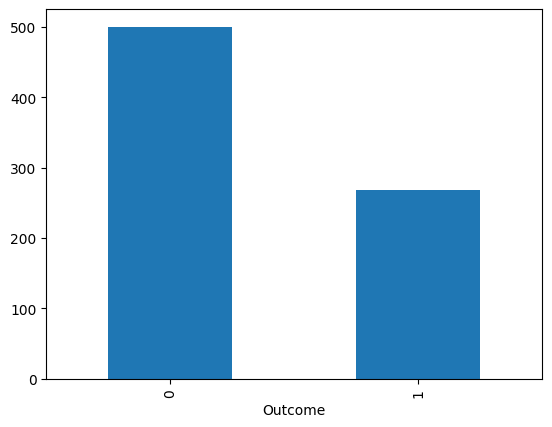

In [9]:
df['Outcome'].value_counts().plot(kind='bar')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

<AxesSubplot: >

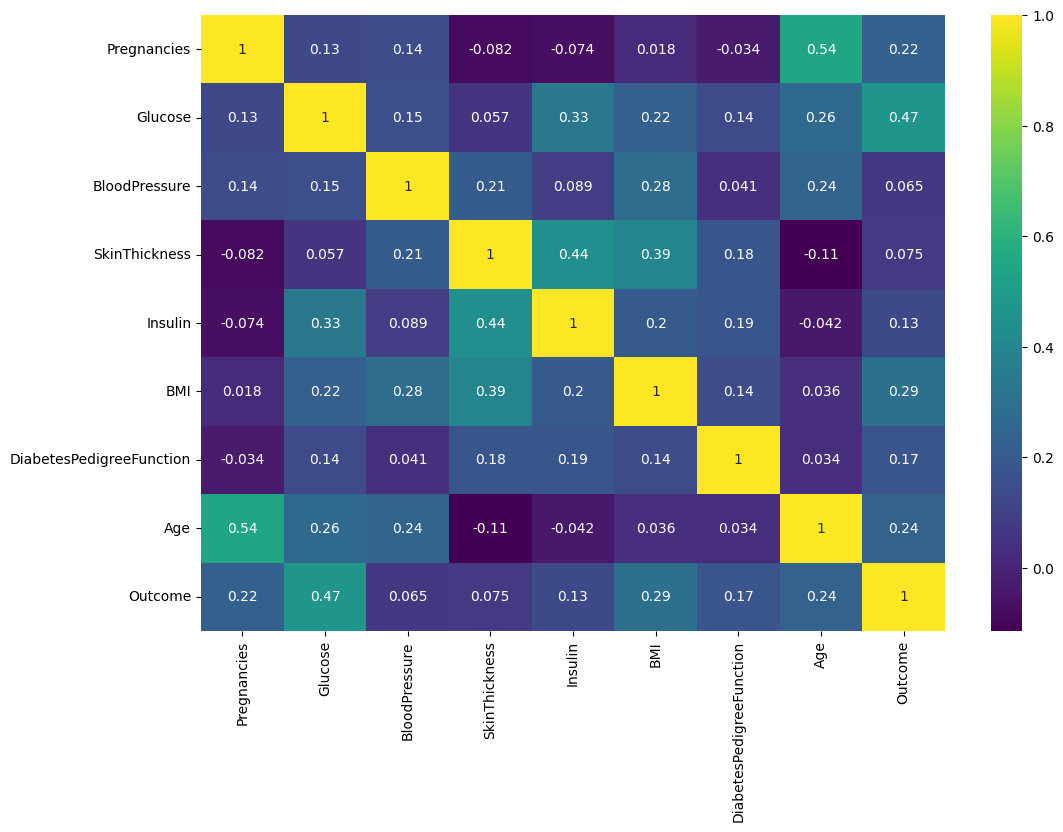

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

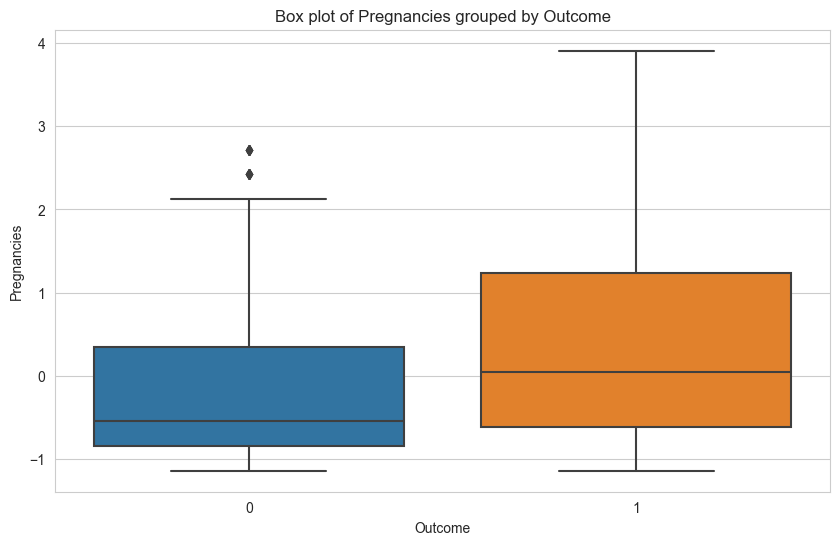

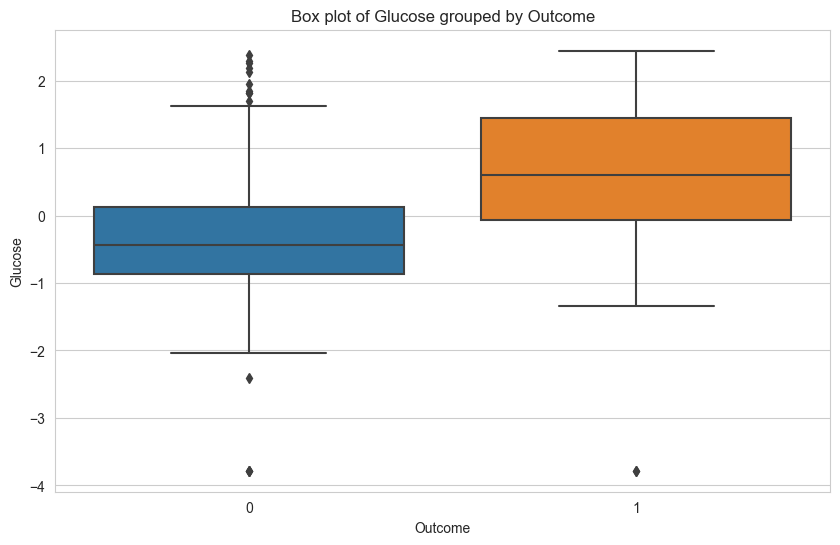

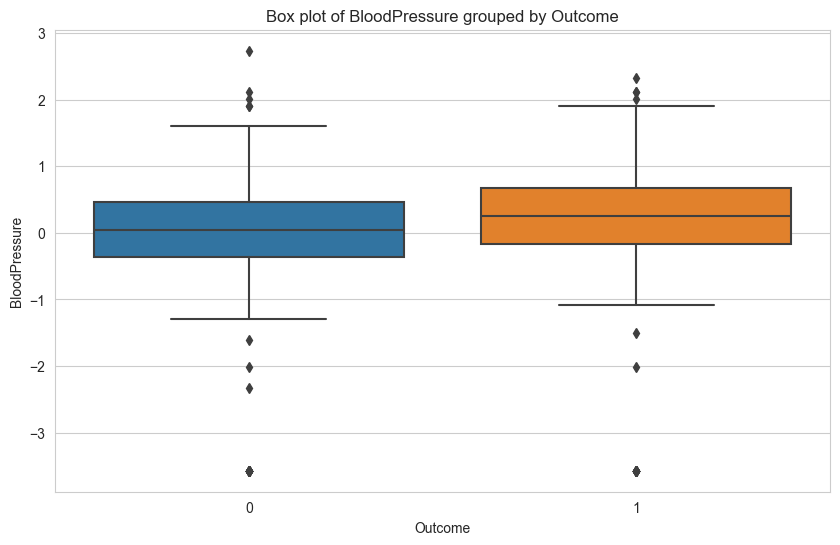

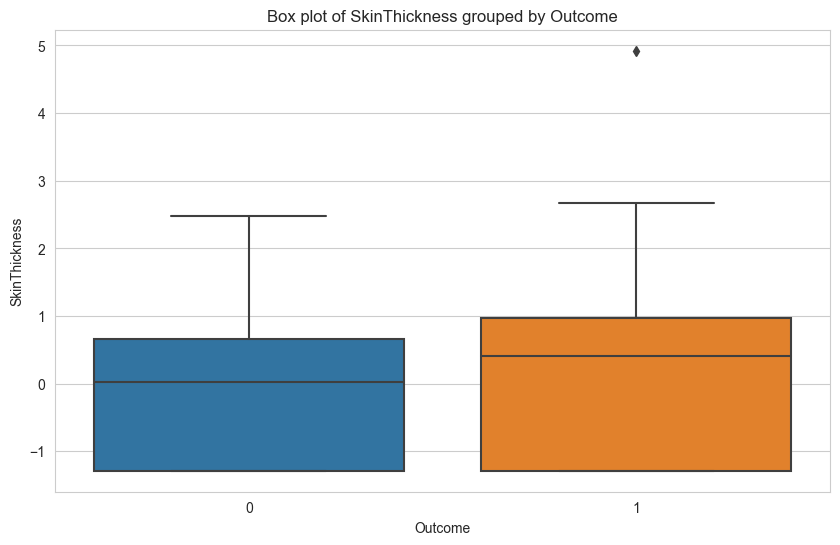

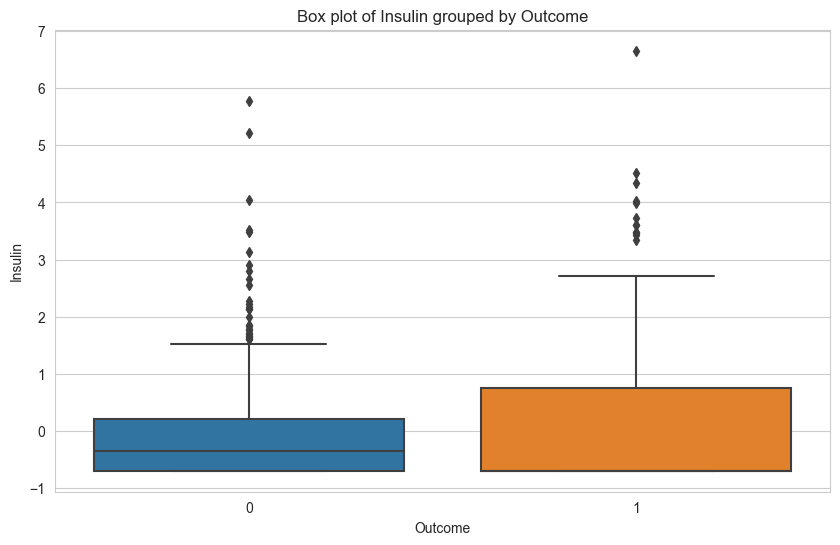

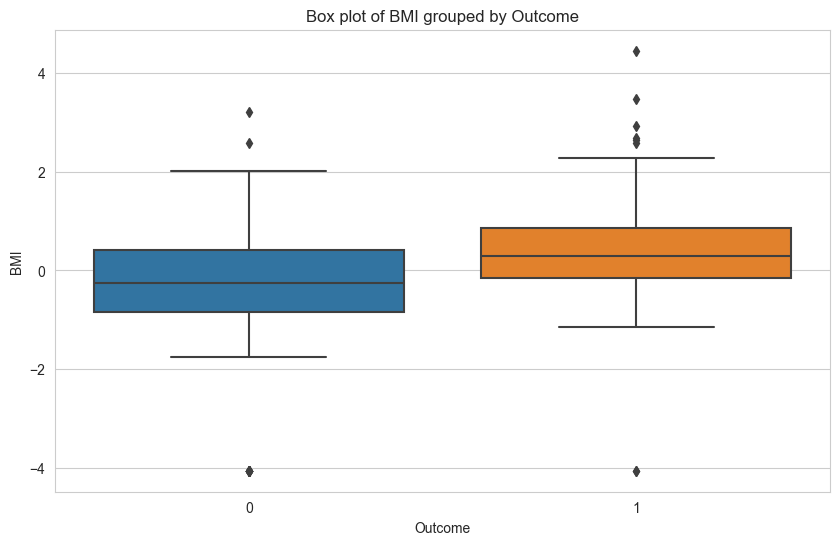

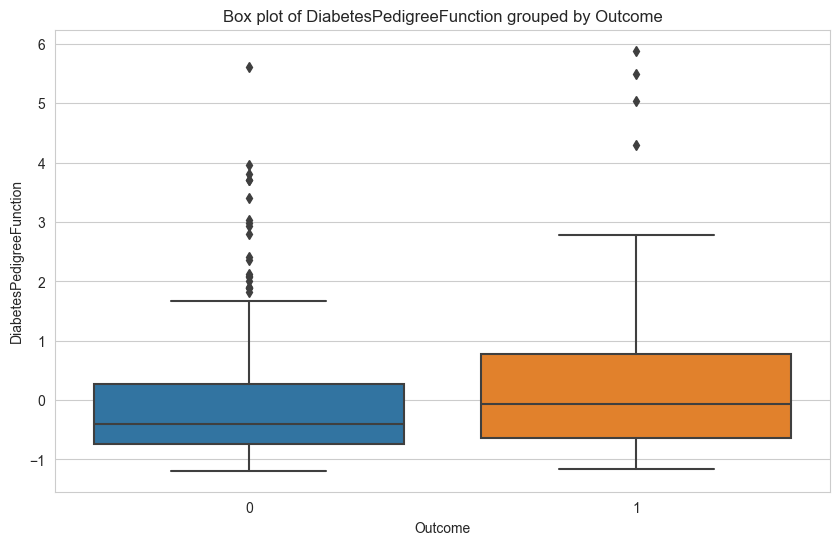

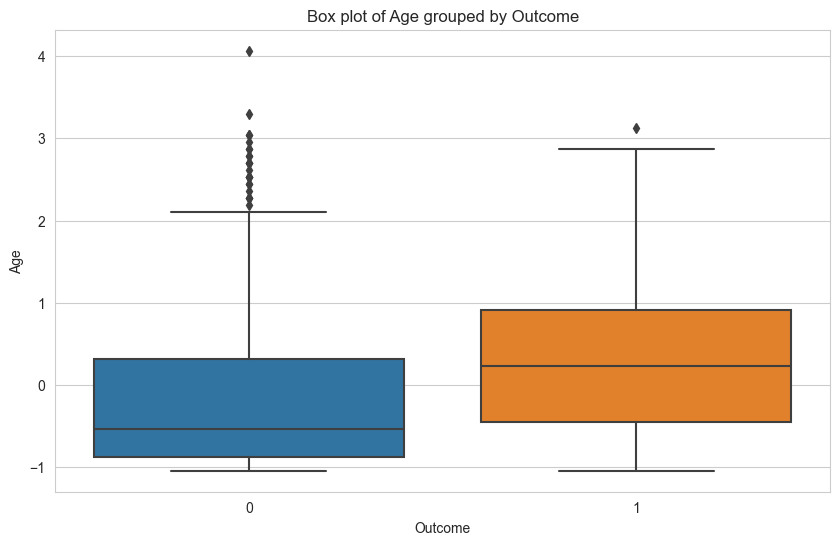

In [43]:

import seaborn as sns
sns.set_style("whitegrid")

# 2. Box Plots for Each Variable Grouped by Outcome
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Box plot of {col} grouped by Outcome')
    plt.show()

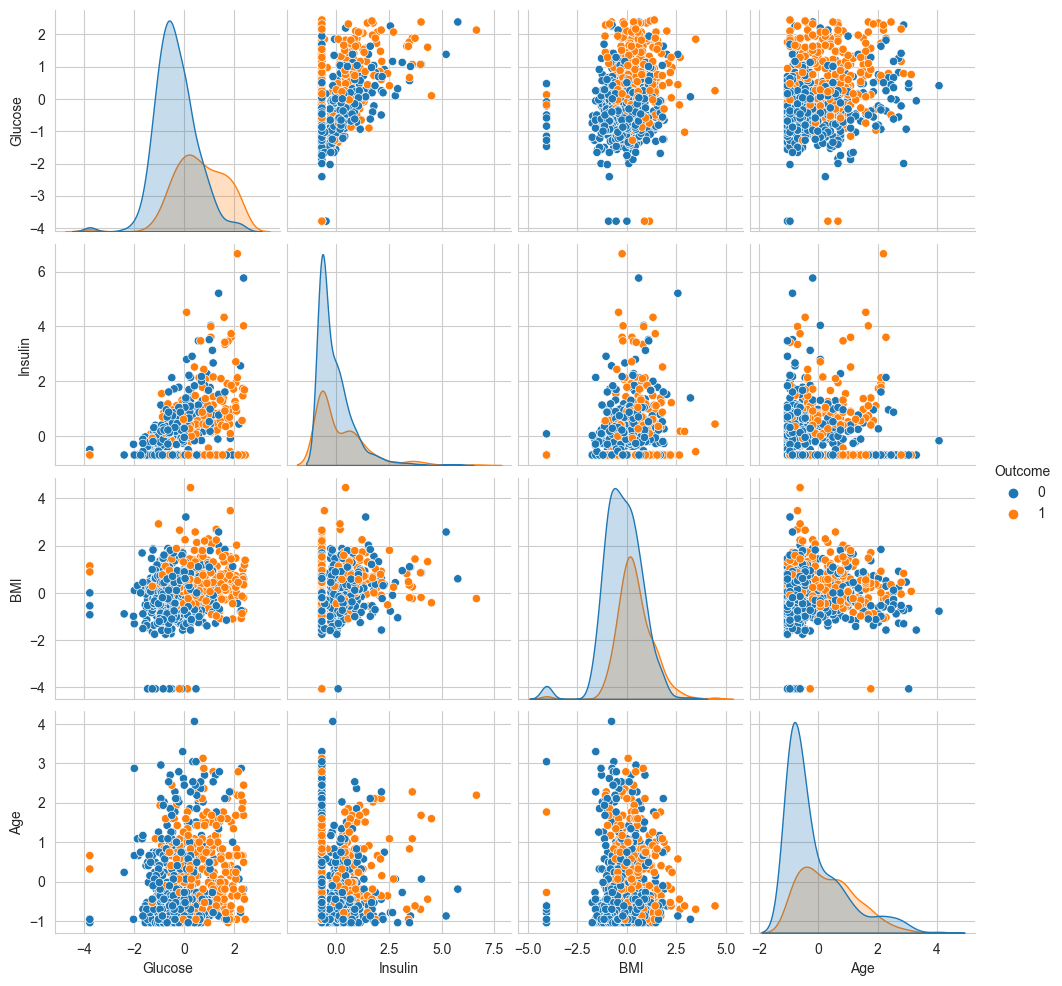

In [44]:
pairwise_columns = ['Glucose', 'Insulin', 'BMI', 'Age']
sns.pairplot(df, vars=pairwise_columns, hue='Outcome')
plt.show()

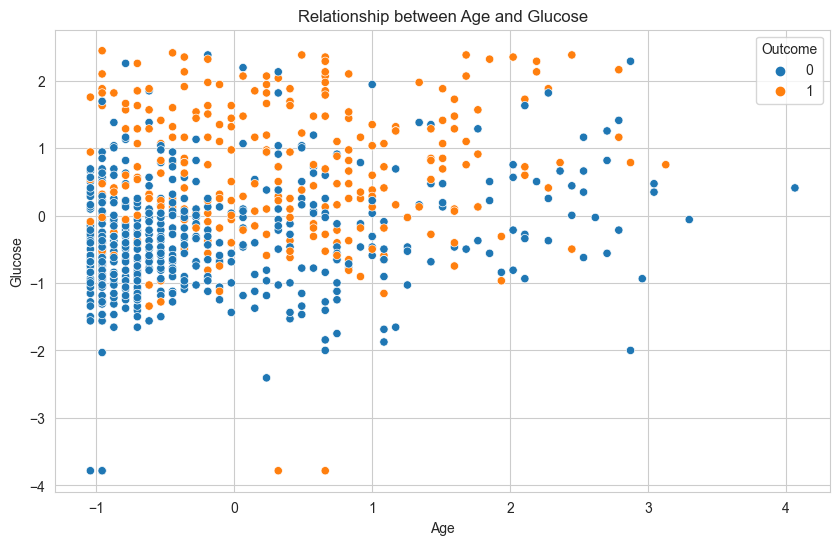

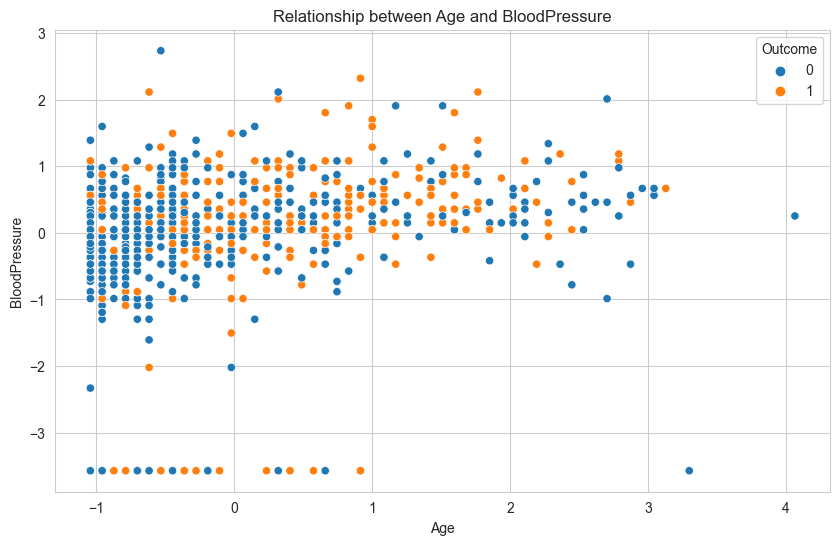

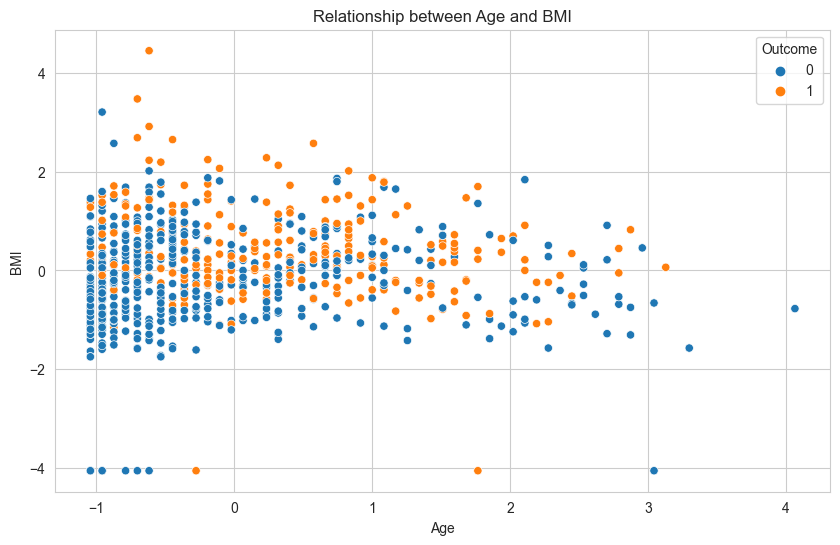

In [45]:
for col in ['Glucose', 'BloodPressure', 'BMI']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y=col, hue='Outcome', data=df)
    plt.title(f'Relationship between Age and {col}')
    plt.show()

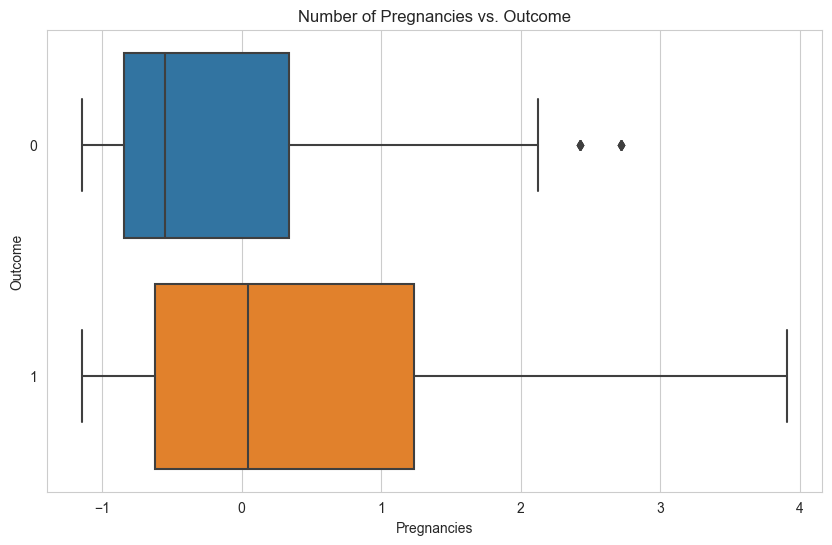

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pregnancies', y='Outcome', data=df, orient='h')
plt.title('Number of Pregnancies vs. Outcome')
plt.show()

In [12]:
X = df.drop('Outcome', axis=1)
y= df.Outcome

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# training with original data : 
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict using the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 75.76%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



In [41]:
fpr_norm, tpr_norm, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
roc_auc_norm = auc(fpr_norm, tpr_norm)

In [37]:
# training with SMOTE data : 
rf_classifier_sm = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier_sm.fit(X_res, y_res)

# Predict using the test set
y_res_pred = rf_classifier_sm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_res_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_res_pred))

Accuracy: 73.59%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       151
           1       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [39]:
fpr_sm, tpr_sm, _ = roc_curve(y_test, rf_classifier_sm.predict_proba(X_test)[:,1])
roc_auc_sm = auc(fpr_sm, tpr_sm)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report

# NearMiss
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X_train, y_train)

rf_classifier_nm = RandomForestClassifier(random_state=42)
rf_classifier_nm.fit(X_nm, y_nm)
y_nm_pred = rf_classifier_nm.predict(X_test)
accuracy = accuracy_score(y_test, y_nm_pred)
print(f"NearMiss Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report for NearMiss:\n", classification_report(y_test, y_nm_pred))

fpr_nm, tpr_nm, _ = roc_curve(y_test, rf_classifier_nm.predict_proba(X_test)[:,1])
roc_auc_nm = auc(fpr_nm, tpr_nm)

# BorderlineSMOTE
blsmote = BorderlineSMOTE(random_state=42)
X_blsmote, y_blsmote = blsmote.fit_resample(X_train, y_train)

rf_classifier_blsmote = RandomForestClassifier(random_state=42)
rf_classifier_blsmote.fit(X_blsmote, y_blsmote)
y_blsmote_pred = rf_classifier_blsmote.predict(X_test)
accuracy = accuracy_score(y_test, y_blsmote_pred)
print(f"BorderlineSMOTE Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report for BorderlineSMOTE:\n", classification_report(y_test, y_blsmote_pred))

fpr_blsmote, tpr_blsmote, _ = roc_curve(y_test, rf_classifier_blsmote.predict_proba(X_test)[:,1])
roc_auc_blsmote = auc(fpr_blsmote, tpr_blsmote)

# ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

rf_classifier_adasyn = RandomForestClassifier(random_state=42)
rf_classifier_adasyn.fit(X_adasyn, y_adasyn)
y_adasyn_pred = rf_classifier_adasyn.predict(X_test)
accuracy = accuracy_score(y_test, y_adasyn_pred)
print(f"ADASYN Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report for ADASYN:\n", classification_report(y_test, y_adasyn_pred))

fpr_adasyn, tpr_adasyn, _ = roc_curve(y_test, rf_classifier_adasyn.predict_proba(X_test)[:,1])
roc_auc_adasyn = auc(fpr_adasyn, tpr_adasyn)


NearMiss Accuracy: 69.70%

Classification Report for NearMiss:
               precision    recall  f1-score   support

           0       0.85      0.66      0.74       151
           1       0.54      0.78      0.64        80

    accuracy                           0.70       231
   macro avg       0.70      0.72      0.69       231
weighted avg       0.74      0.70      0.70       231

BorderlineSMOTE Accuracy: 72.73%

Classification Report for BorderlineSMOTE:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       151
           1       0.59      0.70      0.64        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231

ADASYN Accuracy: 72.73%

Classification Report for ADASYN:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       151
           1       0.59      0.71  

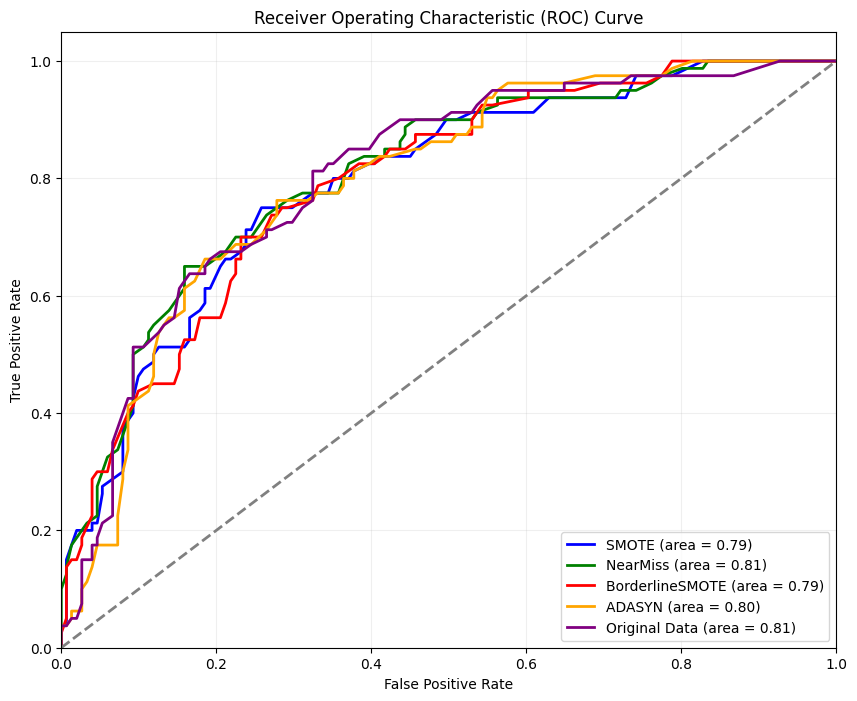

In [42]:
import matplotlib.pyplot as plt

fpr_norm, tpr_norm, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
roc_auc_norm = auc(fpr_norm, tpr_norm)


plt.figure(figsize=(10,8))
plt.plot(fpr_sm, tpr_sm, color='blue', lw=2, 
         label=f'SMOTE (area = {roc_auc_sm:.2f})')

plt.plot(fpr_nm, tpr_nm, color='green', lw=2, 
         label=f'NearMiss (area = {roc_auc_nm:.2f})')

plt.plot(fpr_blsmote, tpr_blsmote, color='red', lw=2, 
         label=f'BorderlineSMOTE (area = {roc_auc_blsmote:.2f})')

plt.plot(fpr_adasyn, tpr_adasyn, color='orange', lw=2, 
         label=f'ADASYN (area = {roc_auc_adasyn:.2f})')

plt.plot(fpr_norm, tpr_norm, color='purple', lw=2, 
         label=f'Original Data (area = {roc_auc_norm:.2f})')

# Plotting the random classifier (diagonal)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

plt.show()


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming the target variable is 'Outcome' and the rest are features
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Method for sampling data points (with or without replacement)
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Find the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

(best_params, best_score)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


({'bootstrap': True,
  'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 100},
 0.7866986538717845)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier with the best hyperparameters
rf_classifier_optimized = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    bootstrap=True,
    random_state=42
)

# Train the model with the optimized hyperparameters
rf_classifier_optimized.fit(X_train, y_train)

# Predict using the test set
y_pred_optimized = rf_classifier_optimized.predict(X_test)

# Evaluate the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {accuracy_optimized * 100:.2f}%")
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


Optimized Accuracy: 74.68%

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [52]:
# Calculate the required statistics
total_patients = len(df)
avg_pregnancies = df['Pregnancies'].mean()
avg_skin_thickness = df['SkinThickness'].mean()
avg_insulin = df['Insulin'].mean()

# Calculate the correlation of certain features with the 'Outcome'
correlation_age_outcome = df['Age'].corr(df['Outcome'])
correlation_bmi_outcome = df['BMI'].corr(df['Outcome'])
correlation_bp_outcome = df['BloodPressure'].corr(df['Outcome'])
correlation_pregnancies_outcome = df['Pregnancies'].corr(df['Outcome'])

# Calculate the percentage of middle-aged people in the dataset and their risk increase
middle_age = df[(df['Age'] >= 40) & (df['Age'] < 60)]
percent_middle_age = (len(middle_age) / total_patients) * 100
middle_age_diabetes_risk_increase = middle_age['Outcome'].mean() / df['Outcome'].mean()

# Calculate the percentage of people with high BMI (obesity indicator) and their risk increase
high_bmi = df[df['BMI'] >= 30]  # Typically, a BMI of 30 or more is considered obese
percent_high_bmi = (len(high_bmi) / total_patients) * 100
high_bmi_diabetes_risk_increase = high_bmi['Outcome'].mean() / df['Outcome'].mean()

# Calculate the percentage of people with high blood pressure and their risk increase
high_bp = df[df['BloodPressure'] >= 80]  # A blood pressure of 80 or more is considered high/raised
percent_high_bp = (len(high_bp) / total_patients) * 100
high_bp_diabetes_risk_increase = high_bp['Outcome'].mean() / df['Outcome'].mean()

# Calculate the relationship between the number of pregnancies and diabetes risk
more_pregnancies = df[df['Pregnancies'] >= df['Pregnancies'].median()]
pregnancies_diabetes_risk_increase = more_pregnancies['Outcome'].mean() / df['Outcome'].mean()

# Prepare the summary statistics and insights
summary_statistics = {
    "Total Patients": total_patients,
    "Avg. Pregnancies": avg_pregnancies,
    "Avg. Skin Thickness (mm)": avg_skin_thickness,
    "Avg. Insulin (mu U/ml)": avg_insulin,
    "Correlation Age and Outcome": correlation_age_outcome,
    "Correlation BMI and Outcome": correlation_bmi_outcome,
    "Correlation BP and Outcome": correlation_bp_outcome,
    "Correlation Pregnancies and Outcome": correlation_pregnancies_outcome,
    "Middle Age Percent": percent_middle_age,
    "Middle Age Diabetes Risk Increase": middle_age_diabetes_risk_increase,
    "High BMI Percent": percent_high_bmi,
    "High BMI Diabetes Risk Increase": high_bmi_diabetes_risk_increase,
    "High BP Percent": percent_high_bp,
    "High BP Diabetes Risk Increase": high_bp_diabetes_risk_increase,
    "Pregnancies Diabetes Risk Increase": pregnancies_diabetes_risk_increase
}

summary_statistics


{'Total Patients': 768,
 'Avg. Pregnancies': -6.47630097698008e-17,
 'Avg. Skin Thickness (mm)': 1.0061396160665481e-16,
 'Avg. Insulin (mu U/ml)': -3.0068540250264654e-17,
 'Correlation Age and Outcome': 0.23835598302719754,
 'Correlation BMI and Outcome': 0.2926946626444453,
 'Correlation BP and Outcome': 0.06506835955033276,
 'Correlation Pregnancies and Outcome': 0.2218981530339866,
 'Middle Age Percent': 0.0,
 'Middle Age Diabetes Risk Increase': nan,
 'High BMI Percent': 0.0,
 'High BMI Diabetes Risk Increase': nan,
 'High BP Percent': 0.0,
 'High BP Diabetes Risk Increase': nan,
 'Pregnancies Diabetes Risk Increase': 1.2447547465536282}